In [656]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading datasets

In [657]:
fitbit_daily_activity_df = pd.read_csv('../../../../data/client_data/cleaned/fitbit/cleaned_fitbit_grouped_dups.csv')
fitbit_daily_activity_df.head()

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
0,13,480,403.0,8416.0,2048.0,1748.0,2023-05-08 17:56:01.406000+00:00,2023-05-09 23:56:02.232000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,480,383.0,9753.0,2048.0,1848.0,2023-05-10 00:00:03.442000+00:00,2023-05-11 23:56:04.105000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,480,462.0,273.0,2048.0,1199.0,2023-05-12 00:00:03.483000+00:00,2023-05-13 23:56:03.522000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,480,421.0,2504.0,2048.0,745.0,2023-05-14 00:00:03.142000+00:00,2023-05-15 10:28:03.909000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33,480,421.0,11681.0,2048.0,2025.0,2023-05-15 12:00:04.019000+00:00,2023-05-15 23:55:04.824000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [631]:
fitbit_daily_activity_df.head()

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
0,13,480,403.0,8416.0,2048.0,1748.0,2023-05-08 17:56:01.406000+00:00,2023-05-09 23:56:02.232000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,480,383.0,9753.0,2048.0,1848.0,2023-05-10 00:00:03.442000+00:00,2023-05-11 23:56:04.105000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,480,462.0,273.0,2048.0,1199.0,2023-05-12 00:00:03.483000+00:00,2023-05-13 23:56:03.522000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,480,421.0,2504.0,2048.0,745.0,2023-05-14 00:00:03.142000+00:00,2023-05-15 10:28:03.909000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33,480,421.0,11681.0,2048.0,2025.0,2023-05-15 12:00:04.019000+00:00,2023-05-15 23:55:04.824000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [632]:
intensity_steps_df = fitbit_daily_activity_df[['steps', 'intensity']]
intensity_steps_df = intensity_steps_df.dropna()
len(intensity_steps_df)

41

In [633]:
#^ note only 41 datapoints to cluster with, limited sample

In [634]:
intensity_steps_df.head()

,steps,intensity
20,9372.0,12.0
21,10630.0,13.0
22,9129.0,44.0
23,11334.0,11.0
24,7567.0,30.0


In [635]:
intensity_steps_df.describe()

,steps,intensity
count,41.000000,41.000000
mean,8672.585366,39.658537
std,4275.784361,36.990951
min,1895.000000,10.000000
25%,6650.000000,13.000000
50%,8149.000000,30.000000
75%,9805.000000,44.000000
max,29384.000000,188.000000


# Feature Scaling and Transformation

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_73718/2866361610.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  intensity_steps_df.hist(ax=axis, bins=20)


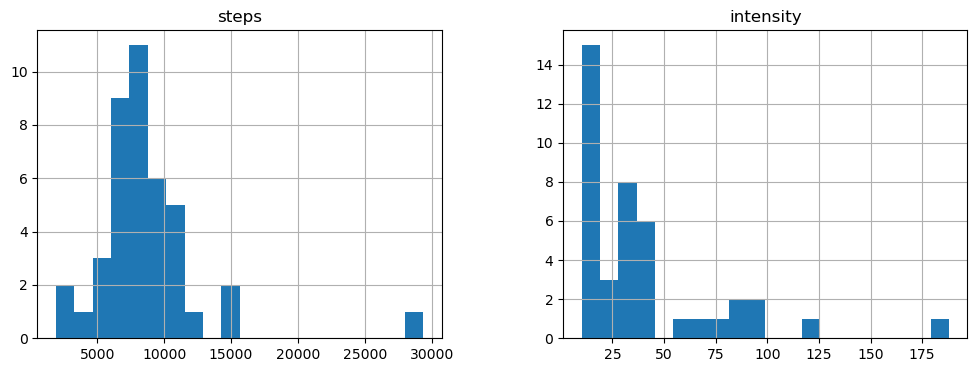

In [636]:
# inspecting the distribution of each feature:
fig, axis = plt.subplots(figsize=(12, 4))
intensity_steps_df.hist(ax=axis, bins=20)
plt.show()

In [637]:
intensity_steps_df.skew()

steps        2.949818
intensity    2.159399
dtype: float64

In [638]:
before_unskewed_df = intensity_steps_df.copy() #(for comparison after)

In [639]:
def box_cox_transformation(feature, l):
    transform = ColumnTransformer(transformers=[("box-cox", FunctionTransformer(lambda X: stats.boxcox(X, lmbda=l)), [feature])])
    # return pd.DataFrame(transform.fit_transform(activity_steps_df))
    return transform.fit_transform(intensity_steps_df)

In [640]:
intensity_steps_df['intensity'] = box_cox_transformation(feature="intensity", l=-0.35)
intensity_steps_df['steps'] = box_cox_transformation(feature="steps", l=0.13)

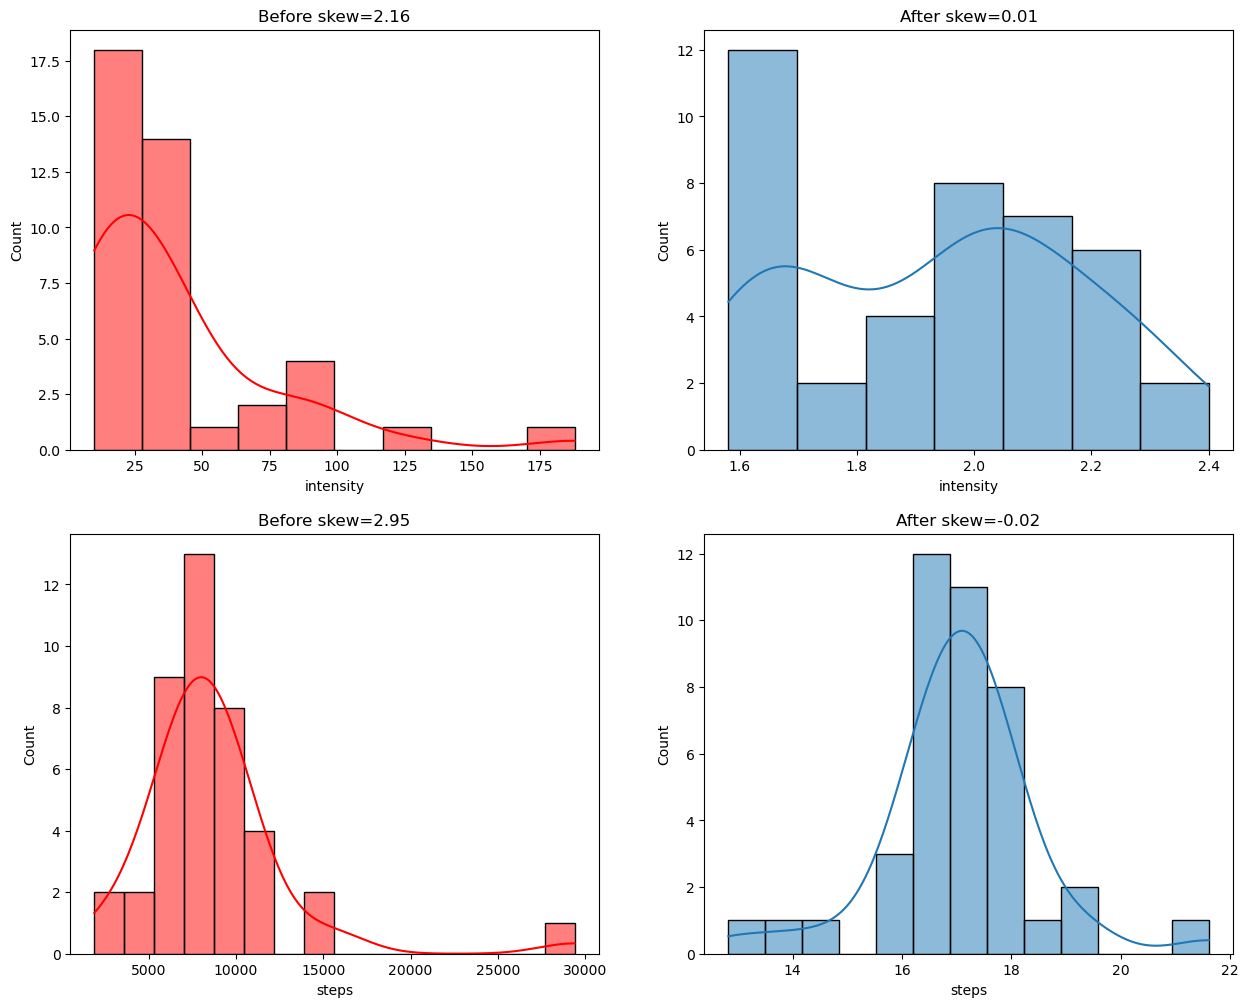

In [641]:

fig, ax = plt.subplots(2, 2, figsize=(15,12))
# activity_steps_df.hist(ax=ax, bins=20)
sns.histplot(before_unskewed_df['intensity'], kde=True, ax=ax[0,0], color='red').set(title=f"Before skew={before_unskewed_df['intensity'].skew():0.2f}")
sns.histplot(intensity_steps_df['intensity'], kde=True, ax=ax[0,1]).set(title=f"After skew={intensity_steps_df['intensity'].skew():0.2f}")

sns.histplot(before_unskewed_df['steps'], kde=True, ax=ax[1,0], color='red').set(title=f"Before skew={before_unskewed_df['steps'].skew():0.2f}")
sns.histplot(intensity_steps_df['steps'], kde=True, ax=ax[1,1]).set(title=f"After skew={intensity_steps_df['steps'].skew():0.2f}")

plt.show()

In [642]:
intensity_steps_df.describe()

,steps,intensity
count,41.000000,41.000000
mean,17.049662,1.939908
std,1.406270,0.242219
min,12.826204,1.580904
25%,16.463606,1.692878
50%,17.110464,1.988303
75%,17.714192,2.097300
max,21.610624,2.400079


# Scaling the features

In [643]:
#^ since the scales are different it's worth scaling the values to be of the same scales, so steps isn't given more weight than activity minutes

In [644]:
scaler = StandardScaler()
scaled_intensity_steps = scaler.fit_transform(intensity_steps_df)
scaled_intensity_steps

array([[ 0.37133607, -1.17079426],
       [ 0.67153049, -1.03253514],
       [ 0.30934116,  0.65786637],
       [ 0.82626744, -1.32555008],
       [-0.12740791,  0.20228152],
       [ 1.61405241,  0.55013323],
       [-0.1696728 , -1.03253514],
       [-0.32744646,  0.15893434],
       [ 0.20731109, -1.17079426],
       [ 0.1173835 , -1.32555008],
       [ 0.16871153, -1.03253514],
       [ 3.28359524,  1.92341827],
       [ 1.5767024 ,  1.35185889],
       [-0.11165582,  0.11352086],
       [-0.22331762, -0.09271449],
       [-0.00509819,  1.63006999],
       [-0.16535407, -0.21413345],
       [-0.96834395, -1.50056309],
       [ 0.23212051,  0.24372074],
       [ 0.68843262,  1.12060176],
       [ 0.6204244 ,  1.4167657 ],
       [-0.47134515, -0.79480396],
       [-0.57023329, -0.50866456],
       [-0.29810413, -1.32555008],
       [ 0.47841845,  1.30111955],
       [-2.28167859,  0.3579357 ],
       [-0.54836486,  0.3579357 ],
       [-0.87739623, -1.17079426],
       [-0.18950619,

In [645]:
scaled_intensity_steps_df = pd.DataFrame(scaled_intensity_steps, columns=intensity_steps_df.columns)
scaled_intensity_steps_df

,steps,intensity
0,0.371336,-1.170794
1,0.671530,-1.032535
2,0.309341,0.657866
3,0.826267,-1.325550
4,-0.127408,0.202282
5,1.614052,0.550133
6,-0.169673,-1.032535
7,-0.327446,0.158934
8,0.207311,-1.170794
9,0.117383,-1.325550


In [646]:
scaled_intensity_steps_df.describe()

,steps,intensity
count,4.100000e+01,4.100000e+01
mean,-2.095884e-15,-7.636168e-16
std,1.012423e+00,1.012423e+00
min,-3.040615e+00,-1.500563e+00
25%,-4.219223e-01,-1.032535e+00
50%,4.377337e-02,2.022815e-01
75%,4.784185e-01,6.578664e-01
max,3.283595e+00,1.923418e+00


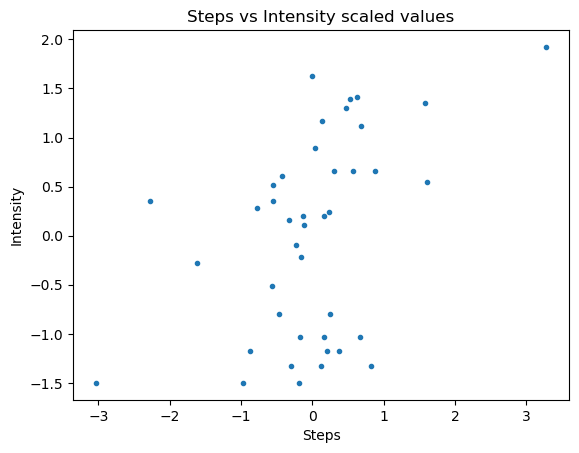

In [647]:
plt.plot(scaled_intensity_steps_df['steps'].values, scaled_intensity_steps_df['intensity'].values, '.')
plt.xlabel('Steps')
plt.ylabel('Intensity')
plt.title('Steps vs Intensity scaled values')
plt.show()

In [648]:
#^^^ perhaps remove that outlier in the top left??

# K-means clustering

In [649]:

#! number of clusters?
model = KMeans(n_clusters=5, random_state=0)
kmeans_labels = model.fit_predict(scaled_intensity_steps_df.values)
# kmeans.labels_

In [650]:
kmeans_labels

array([3, 3, 4, 3, 0, 4, 3, 0, 3, 3, 3, 1, 4, 0, 0, 4, 0, 3, 0, 4, 4, 3,
       0, 3, 4, 2, 0, 3, 3, 0, 4, 3, 4, 4, 0, 4, 2, 2, 0, 0, 4],
      dtype=int32)

In [651]:
scaled_intensity_steps_df.describe()

,steps,intensity
count,4.100000e+01,4.100000e+01
mean,-2.095884e-15,-7.636168e-16
std,1.012423e+00,1.012423e+00
min,-3.040615e+00,-1.500563e+00
25%,-4.219223e-01,-1.032535e+00
50%,4.377337e-02,2.022815e-01
75%,4.784185e-01,6.578664e-01
max,3.283595e+00,1.923418e+00


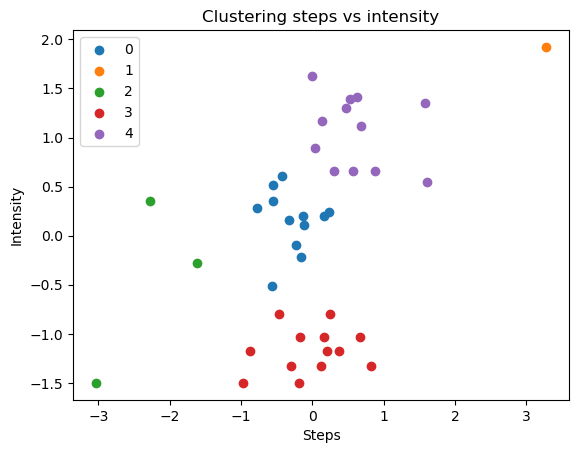

In [652]:
#Getting unique labels
 
u_labels = np.unique(kmeans_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(scaled_intensity_steps_df[kmeans_labels == i]['steps'], scaled_intensity_steps_df[kmeans_labels == i]['intensity'] , label = i)
plt.legend()

plt.title("Clustering steps vs intensity")
plt.xlabel('Steps')
plt.ylabel('Intensity')
plt.show()

In [653]:
scaled_intensity_steps_df.values

array([[ 0.37133607, -1.17079426],
       [ 0.67153049, -1.03253514],
       [ 0.30934116,  0.65786637],
       [ 0.82626744, -1.32555008],
       [-0.12740791,  0.20228152],
       [ 1.61405241,  0.55013323],
       [-0.1696728 , -1.03253514],
       [-0.32744646,  0.15893434],
       [ 0.20731109, -1.17079426],
       [ 0.1173835 , -1.32555008],
       [ 0.16871153, -1.03253514],
       [ 3.28359524,  1.92341827],
       [ 1.5767024 ,  1.35185889],
       [-0.11165582,  0.11352086],
       [-0.22331762, -0.09271449],
       [-0.00509819,  1.63006999],
       [-0.16535407, -0.21413345],
       [-0.96834395, -1.50056309],
       [ 0.23212051,  0.24372074],
       [ 0.68843262,  1.12060176],
       [ 0.6204244 ,  1.4167657 ],
       [-0.47134515, -0.79480396],
       [-0.57023329, -0.50866456],
       [-0.29810413, -1.32555008],
       [ 0.47841845,  1.30111955],
       [-2.28167859,  0.3579357 ],
       [-0.54836486,  0.3579357 ],
       [-0.87739623, -1.17079426],
       [-0.18950619,

In [654]:
# specific user's recent week values:
#! need to keep the Id field in the dataset and the createdAt date at least

In [655]:
# model.predict(user_last_week_values)


In [ ]:
# the values need to go through the same scaling etc - hence the pipeline ;) just do this from the python version instead
# of the notebook??? - probably

# model.predict(np.array([]))